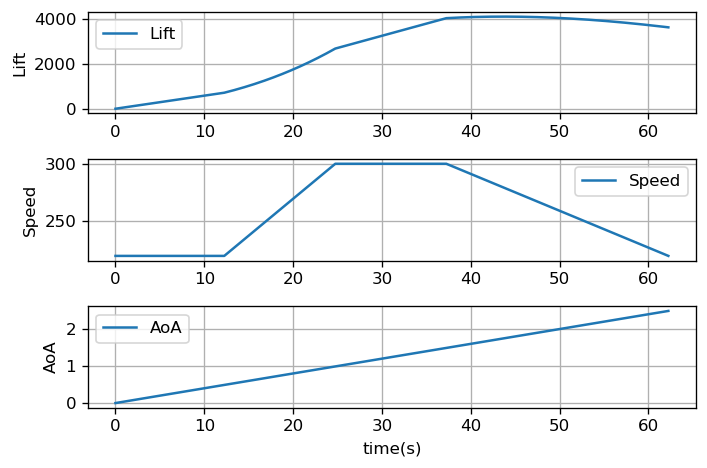

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

df1 = pd.read_csv("LiftEquationData.csv")
t = df1['Time']
v = df1['V']
alfa = df1['Alfa']
L = df1['Lift']

plt.subplot(3,1,1)
plt.plot(t,L)
plt.ylabel('Lift')
plt.grid()
plt.legend(['Lift'])
plt.subplot(3,1,2)
plt.plot(t,v)
plt.ylabel('Speed')
plt.grid()
plt.legend(['Speed'])
plt.subplot(3,1,3)
plt.plot(t,alfa)
plt.ylabel('AoA')
plt.xlabel('time(s)')
plt.grid()
plt.legend(['AoA'])
plt.tight_layout()

In [3]:
df12 = df1.drop(df1.columns[[0,1,2,3,4,5]],axis=1)
listavariables = []
for col in df12.columns:
    listavariables.append(col)
print(listavariables)

['O1', 'X1', 'X2', 'X1X2', 'X12', 'X22', 'X12X2', 'X1X22', 'X12X22', 'X13', 'X23', 'X13X2', 'X13X22', 'X1X23', 'X12X23', 'X13X23']


In [4]:
import numpy as np

from itertools import compress, product

def MultiDLineFit(SampleX,SampleY):
    #SampleX=Sample.drop(ColY,axis=1).values
    #SampleY=Sample[ColY]
    #1D polyfit function
    Ncoeff=SampleX.shape[1]
    #set up least squares equation
    A=np.zeros((Ncoeff,Ncoeff))
    B=np.zeros(Ncoeff)
    C=B*0
    for i in range(Ncoeff):
        for j in range(Ncoeff):
            A[i,j]=np.sum(SampleX[:,j]*SampleX[:,i])
        B[i]=np.sum(SampleY*SampleX[:,i])
    C=np.linalg.solve(A,B)
    C2=np.zeros((len(C),1))
    C2[:,0]=C*1
    #Y=np.dot(X,C)
    return C2

def RMS(target):
    RMS = np.sqrt(np.mean((Outputnumpy - target)*(Outputnumpy - target)))
    return RMS

def combinations(items):
    return ( set(compress(items,mask)) for mask in product(*[[0,1]]*len(items)) )

a = list(combinations(range(7)))
Output = df1['Lift']
Outputnumpy = Output.to_numpy()
Results = pd.DataFrame()
Results = Results.assign(Name=None,RMSE=None)
    
for i in range (127):
    b=list(a[1+i])
    bb = str(b)
    dftarget = df12.iloc[:,b]
    dftargetnumpy = dftarget.to_numpy()
    C = MultiDLineFit(dftargetnumpy,Outputnumpy)
    target = 0
    for j in range(len(C)):
        target += C[j][0]*dftargetnumpy[:,j]
    RMS1 = RMS(target)*len(C)
    New_row = {'Name' : bb, 'RMSE': RMS1}
    Results = Results.append(New_row, ignore_index=True)
Results

,Name,RMSE
0,[6],2.183246e-13
1,[5],1.244917e+03
2,"[5, 6]",6.298817e-13
3,[4],1.219270e+03
4,"[4, 6]",2.658962e-12
...,...,...
122,"[0, 1, 2, 3, 5, 6]",4.955502e-10
123,"[0, 1, 2, 3, 4]",4.107384e+01
124,"[0, 1, 2, 3, 4, 6]",9.420387e-10
125,"[0, 1, 2, 3, 4, 5]",4.685020e+01


In [5]:
minimo = 1000
for i in range(127):
    if Results['RMSE'][i] < minimo:
        minimo = Results['RMSE'][i]

ResultList = list(Results['RMSE'])
Position = ResultList.index(minimo)
print('The best input combination is:', Results['Name'][Position])
print('The RMSE of the regression is:', Results['RMSE'][Position])

The best input combination is: [6]
The RMSE of the regression is: 2.1832455841535776e-13


In [6]:
print(listavariables[6])

X12X2


In [7]:
from sklearn.linear_model import LinearRegression
import pandas as pd

#define URL where dataset is located
url = "LiftEquationData.csv"

#read in data
data = pd.read_csv(url)

#fit regression model
model = LinearRegression()
y = data[["Lift"]]
listaR2_adj = []
Results = pd.DataFrame()
Results = Results.assign(Name=None,R2_Adj=None)
    
for i in range(14):
    X = pd.concat([df12.iloc[:,i]],axis=1)
    model.fit(X, y)
    R2_adj = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
    New_row = {'Name' : df12.columns.values[i], 'R2_Adj': R2_adj}
    Results = Results.append(New_row, ignore_index=True)
Results

,Name,R2_Adj
0,O1,-0.002012
1,X1,0.359194
2,X2,0.841998
3,X1X2,0.958651
4,X12,0.341635
5,X22,0.644928
6,X12X2,1.000000
7,X1X22,0.756192
8,X12X22,0.858646
9,X13,0.324190


In [8]:
maximo = 0
for i in range(14):
    if Results['R2_Adj'][i] > maximo:
        maximo = Results['R2_Adj'][i]

ResultList = list(Results['R2_Adj'])
Position = ResultList.index(maximo)
print('The best input combination is:', Results['Name'][Position])
print('The R2_Adj of the regression is:', Results['R2_Adj'][Position])

The best input combination is: X12X2
The R2_Adj of the regression is: 1.0
